In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from readFunctions import openFile
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
data = openFile('../Data/All_Beauty_5.json.gz')


In [33]:
data.head()


Unnamed: 0  overall  verified   reviewTime      reviewerID        asin  \
0           0      5.0      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1           1      5.0      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2           2      1.0      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3           3      5.0     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4           4      5.0      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2  I bought this to smell nice after I shave.  Wh...   
3  HEY!! I am an Aqua Velva Man and absolutely lo...   
4  If you ever want to feel pampered by a shampoo...   

                                             summary  unixReviewTime vote  \
0                                         Five Stars      1472688000  NaN   
1                                  Good for the face      1384387200  NaN   
2                                       Smells awful      1376784000  NaN   
3  Truth is There IS Nothing Like an AQUA VELVA MAN.      1304380800   25   
4                                    Bvlgari Shampoo      1304640000    3   

  image  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [18]:
print("Mean rating : {}".format(data['overall'].mean()))
print("Mean rating standard deviation: {}".format(data['overall'].std()))


Mean rating : 4.771873220724995
Mean rating standard deviation: 0.74320403799122


Text(0, 0.5, 'count of reviews')

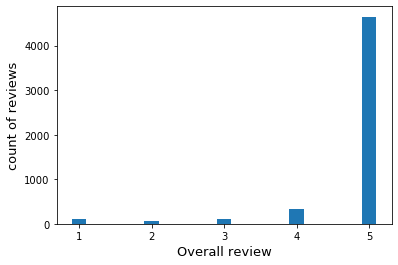

In [19]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.hist(data['overall'], bins=[0.9, 1.1, 1.9, 2.1, 2.9, 3.1, 3.9, 4.1, 4.9, 5.1])
ax.set_xlabel('Overall review', fontsize=13)
ax.set_ylabel('count of reviews', fontsize=13)


In [21]:
num_users = len(data['reviewerID'].unique())
num_items = len(data['asin'].unique())

print("Number of reviewers: {}".format(num_users))
print("Number of products : {}".format(num_items))
print("Number of ratings  : {}".format(len(data)))

avg_num_reviews = data.groupby('reviewerID')['asin'].count()
print("Avg Number of ratings per reviewer {}".format(avg_num_reviews.mean()))


Number of reviewers: 991
Number of products : 85
Number of ratings  : 5269


Text(0, 0.5, 'number of reviewers')

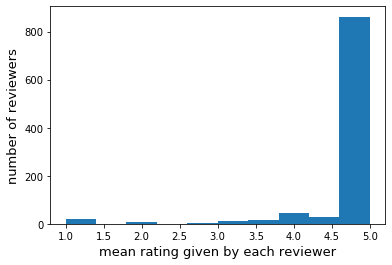

In [22]:
mean_rating_of_user = data.groupby('reviewerID').apply(lambda x: x['overall'].mean())

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.hist(mean_rating_of_user)
ax.set_xlabel('mean rating given by each reviewer', fontsize=13)
ax.set_ylabel('number of reviewers', fontsize=13)

In [41]:
# turn each reviewer and product into categorical data,
data['reviewerID'] = data['reviewerID'].astype("category")
data['asin'] = data['asin'].astype("category")

reviews = csc_matrix((data['overall'].astype(float),
                      (data['reviewerID'].cat.codes,
                       data['asin'].cat.codes)))
print(reviews.shape)


(991, 85)


In [43]:
ratings_matrix = reviews.toarray()

sparsity = float(len(ratings_matrix.nonzero()[0]))
sparsity /= (ratings_matrix.shape[0] * ratings_matrix.shape[1])
sparsity *= 100
print("Sparsity: {:4.2f}%".format(sparsity))


Sparsity: 4.86%


In [25]:
mean_rating = data['overall'].mean()
base_rmse = np.sqrt(pow(data['overall'] - mean_rating, 2).mean())
print("RMSE = {}".format(base_rmse))




RMSE = 0.7431335085449885
